In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from utils.utils import *
import matplotlib.pyplot as plt

In [4]:
data_path = "C:/Users/Maria/OneDrive - UAB/Documentos/2º de IA/NN and Deep Learning/dlnn-project_ia-group_15/data/"
anotation_path= r"C:\Users\Maria\OneDrive - UAB\Documentos\2º de IA\NN and Deep Learning\dlnn-project_ia-group_15\anotations_keras.pkl"
img_dir = data_path + "JPEGImages"
txt_dir = data_path + "ImageSets/0"
path_model = r"C:\Users\Maria\Downloads\glove_transformer_depth_4_head_n_8_drop_0_4_mobilnet_batch_120.pkl"

config = dict(
        epochs=35,
        classes=28,
        batch_size=163,
        batch_size_val_test=163,
        learning_rate=0.00006,
        patience=10,
        heads=4,
        depth=3,
        fc_transformer=340,
        dropout=0.2,
        dataset="ConText",
        architecture="Transformer",
        cnn = "Convext_tiny",
        weights = "DEFAULT",
        name_model="glove_transformer_depth_4_head_n_8_drop_0_4_mobilnet_batch_120.pkl")

In [5]:
from models.models import *
from utils.utils import *

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
config = dict(
        epochs=35,
        classes=28,
        batch_size=16,
        batch_size_val_test=25,
        learning_rate=0.00005,
        patience=10,
        heads=3,
        depth=2,
        fc_transformer=315,
        dataset="ConText",
        architecture="Transformer",
        cnn = "convnext_tiny",
        weights = "DEFAULT")

model, train_loader, test_loader, val_loader = make(config)

Creating anotations...


67it [00:00, 354.89it/s]

Processed 0 images out of 24255


3065it [00:07, 408.99it/s]

Processed 3000 images out of 24255


6064it [00:14, 417.37it/s]

Processed 6000 images out of 24255


9081it [00:22, 419.47it/s]

Processed 9000 images out of 24255


12073it [00:29, 415.42it/s]

Processed 12000 images out of 24255


15075it [00:36, 402.73it/s]

Processed 15000 images out of 24255


18068it [00:43, 459.32it/s]

Processed 18000 images out of 24255


21065it [00:50, 440.66it/s]

Processed 21000 images out of 24255


24051it [00:57, 429.81it/s]

Processed 24000 images out of 24255


24255it [00:58, 415.30it/s]


In [32]:
def de_normalize(images):
  t = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
                           std=[1/0.229, 1/0.224, 1/0.255])
  
  return t(images)

In [63]:
label2class = {1: "Bakery",
10:"Dry Cleaner",
11:"Funeral",
12:"Hotspot",
13:"MassageCenter",
14:"MedicalCenter",
15:"PackingStore",
16:"Pawnshop",
17:"PetShop",
18:"Pharmacy",
19:"Pizzeria",
2:"Barber",
20:"RepairShop",
21:"Restaurant",
22:"School",
23:"SteakHouse",
24:"Tavern",
25:"TeaHouse",
26:"Theatre",
27:"Tobacco",
28:"Motel",
3:"Bistro",
4:"Bookstore",
5:"Cafe",
6:"ComputerStore",
7:"CountryStore",
8:"Diner",
9:"DiscounHouse"}

In [96]:
for label, image, text, mask in train_loader:
    print(image.shape)
    break

In [94]:
from math import ceil
# visualize a batch of data
def visualize_batch(data_loader, n_images=4):
    rndm_idx = np.random.randint(len(data_loader.dataset))
    
    # plot the images in the batch, along with the corresponding labels
    fig, ax = plt.subplots(ceil(n_images/5), 5, figsize=(5*3, ceil(n_images/5)*3))
    # put margins between subplots
    fig.subplots_adjust(hspace=0.5)
    plt.axis('off')
    for i, (label, image, text, mask) in zip(range(n_images), data_loader): 
        plt.subplot(ceil(n_images/5), 5, i+1)
        image = image.reshape(3, 224, 224)
        image = de_normalize(image)
        image = image.permute(1, 2, 0).numpy() 
        image -= image.min()
        image = (image / image.max()) * 255
        plt.title(label2class[label+1])
        plt.imshow(image.astype('uint8'))
        plt.axis('off')

KeyboardInterrupt: 

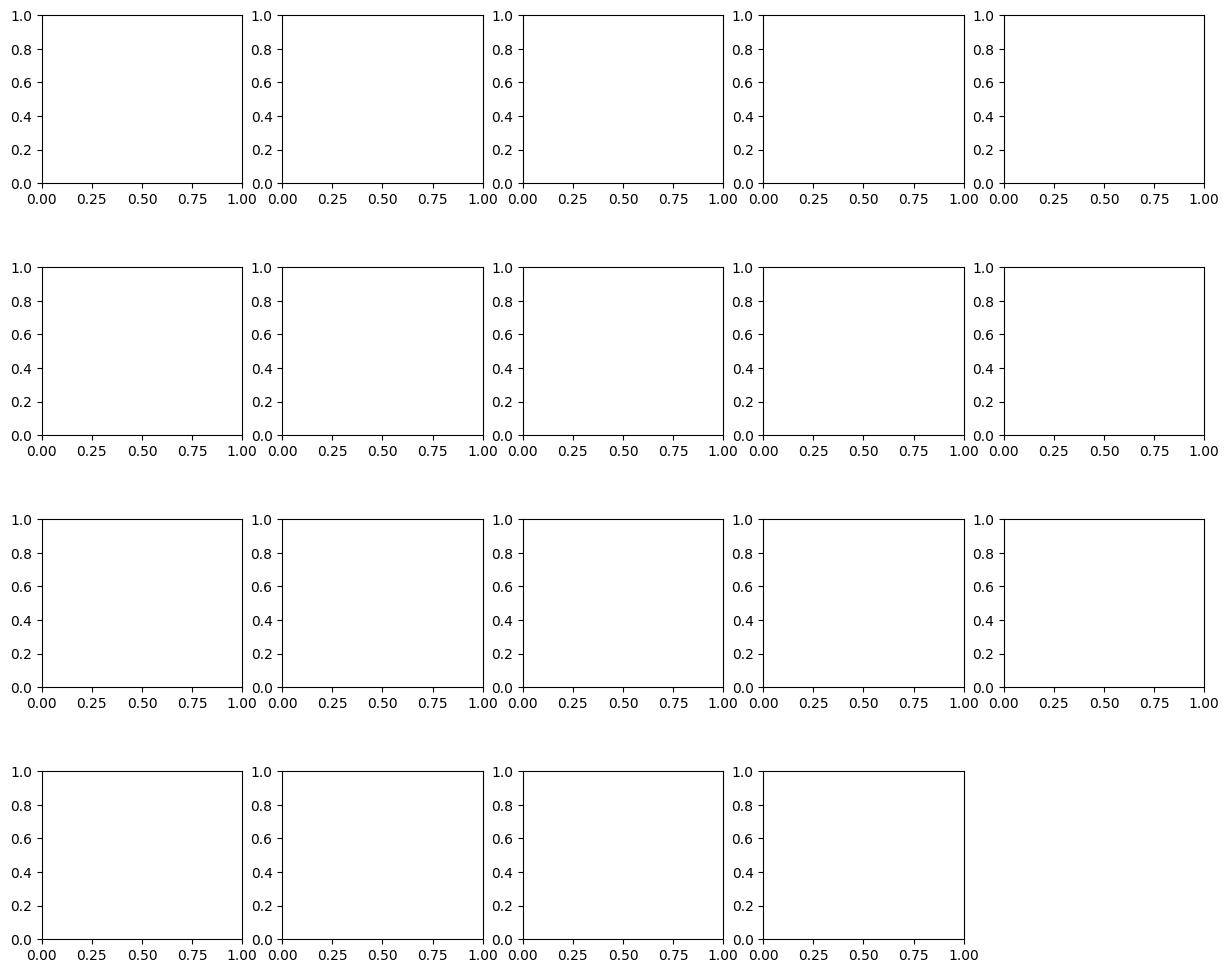

In [95]:
visualize_batch(train_loader, 20)